# 데이터 분석 절차
## 기본 패키지 설정

In [1]:
# 기본 
import matplotlib.pyplot as plt 
import numpy as np 

# 데이터 가져오기 
import pandas as pd 
from sklearn import datasets

# 데이터 전처리 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 훈련 검증용 데이터 분리
from sklearn.model_selection import train_test_split

# 분류 모델 구축 
from sklearn.tree import DecisionTreeClassifier 

# 모델 검정 
from sklearn.metrics import  confusion_matrix, classification_report # 정오 분류표
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score
from sklearn.metrics import roc_curve # roc 곡선  

# 최적화
from sklearn.model_selection import cross_validate # 교차 타당도
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve # 학습 곡선, 검증 곡선
from sklearn.model_selection import GridSearchCV

In [2]:
data_df = pd.read_csv("data.csv")
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data_df.shape

(569, 33)

In [4]:
data_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
x = data_df.drop(data_df.columns[1],axis =1)
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
y = data_df.diagnosis
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# 전처리 시작
- 문자형 자료를 숫자로 인코딩
- 숫자형 자료를 표준화
- 의사결정나무, 랜덤 포레스트, 나이브 베이즈 분류 : 원본 데이터 그대로 유지

In [7]:
x.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# nan 갯수 확인
x = x.drop('Unnamed: 32', axis = 1)

text ='MSZoning LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType Foundation BsmtQual Heating HeatingQC CentralAir Electrical GarageType PavedDrive SaleType SaleCondition'.split()

In [9]:
x.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
le = LabelEncoder()
y = le.fit_transform(y)
y # M : 1 B: 0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [11]:
data_df.diagnosis = y
data_df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [13]:
x= x[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# 훈련 검증용 데이터 분할

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# 모델 구축


In [15]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=1)
dt.fit(x_train,y_train)
# 가지치기를 몇단계 까지 max depth
# max leaf node 몇개
# min sample leaf 마지막 남은 데이터 갯수 허용치 (가지치고 나서 데이터 개수)
# min sample split 부모 단계에서 몇개까지 가지치기 ( 가지치기 전 데이터 개수)

DecisionTreeClassifier(random_state=1)

# 모델 검증

In [16]:
y_pred = dt.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [17]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# 정오 분류표로 검정

In [18]:
confmat = pd.DataFrame(confusion_matrix(y_test,y_pred),
index = ['True[0]','True[1]'],
columns =['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],95,13
True[1],4,59


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       108
           1       0.82      0.94      0.87        63

    accuracy                           0.90       171
   macro avg       0.89      0.91      0.90       171
weighted avg       0.91      0.90      0.90       171



# 정확도 민감도 확인

In [20]:
print('잘못 분류된 샘플 개수 : %d' %(y_test != y_pred).sum())
print('정확도 : %.3f'% accuracy_score(y_test,y_pred))
print('정밀도 : %.3f'% precision_score(y_test,y_pred))
print('재현율 : %.3f'% recall_score(y_test,y_pred))
print('F1 : %.3f'% f1_score(y_test,y_pred))


잘못 분류된 샘플 개수 : 17
정확도 : 0.901
정밀도 : 0.819
재현율 : 0.937
F1 : 0.874


ROC 곡선 그리기

In [21]:
fpr,tpr,thresholds = roc_curve(y_test,dt.predict_proba(x_test)[:,1])

In [22]:
fpr,tpr,thresholds

(array([0.        , 0.12037037, 1.        ]),
 array([0.        , 0.93650794, 1.        ]),
 array([2., 1., 0.]))

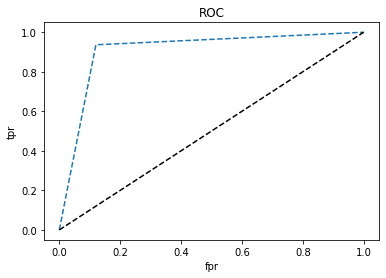

In [23]:
plt.plot(fpr,tpr,'--',label = 'decision Tree')
plt.plot([0,1],[0,1],'k--',label = 'random guess')
plt.plot([fpr],[tpr],'r-',ms = 10)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC')
plt.show()

In [24]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # DT 에서만 쓰임 // CART tree 그림
import pydotplus # DT 에서만 쓰임
import os # DT 에서만 쓰임
## https://www.npackd.org/p/org.graphviz.Graphviz/2.38

In [28]:
os.environ['PATH'] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

In [44]:
feature_name = x.columns.tolist()
target_name = np.array(['No','Yes'])

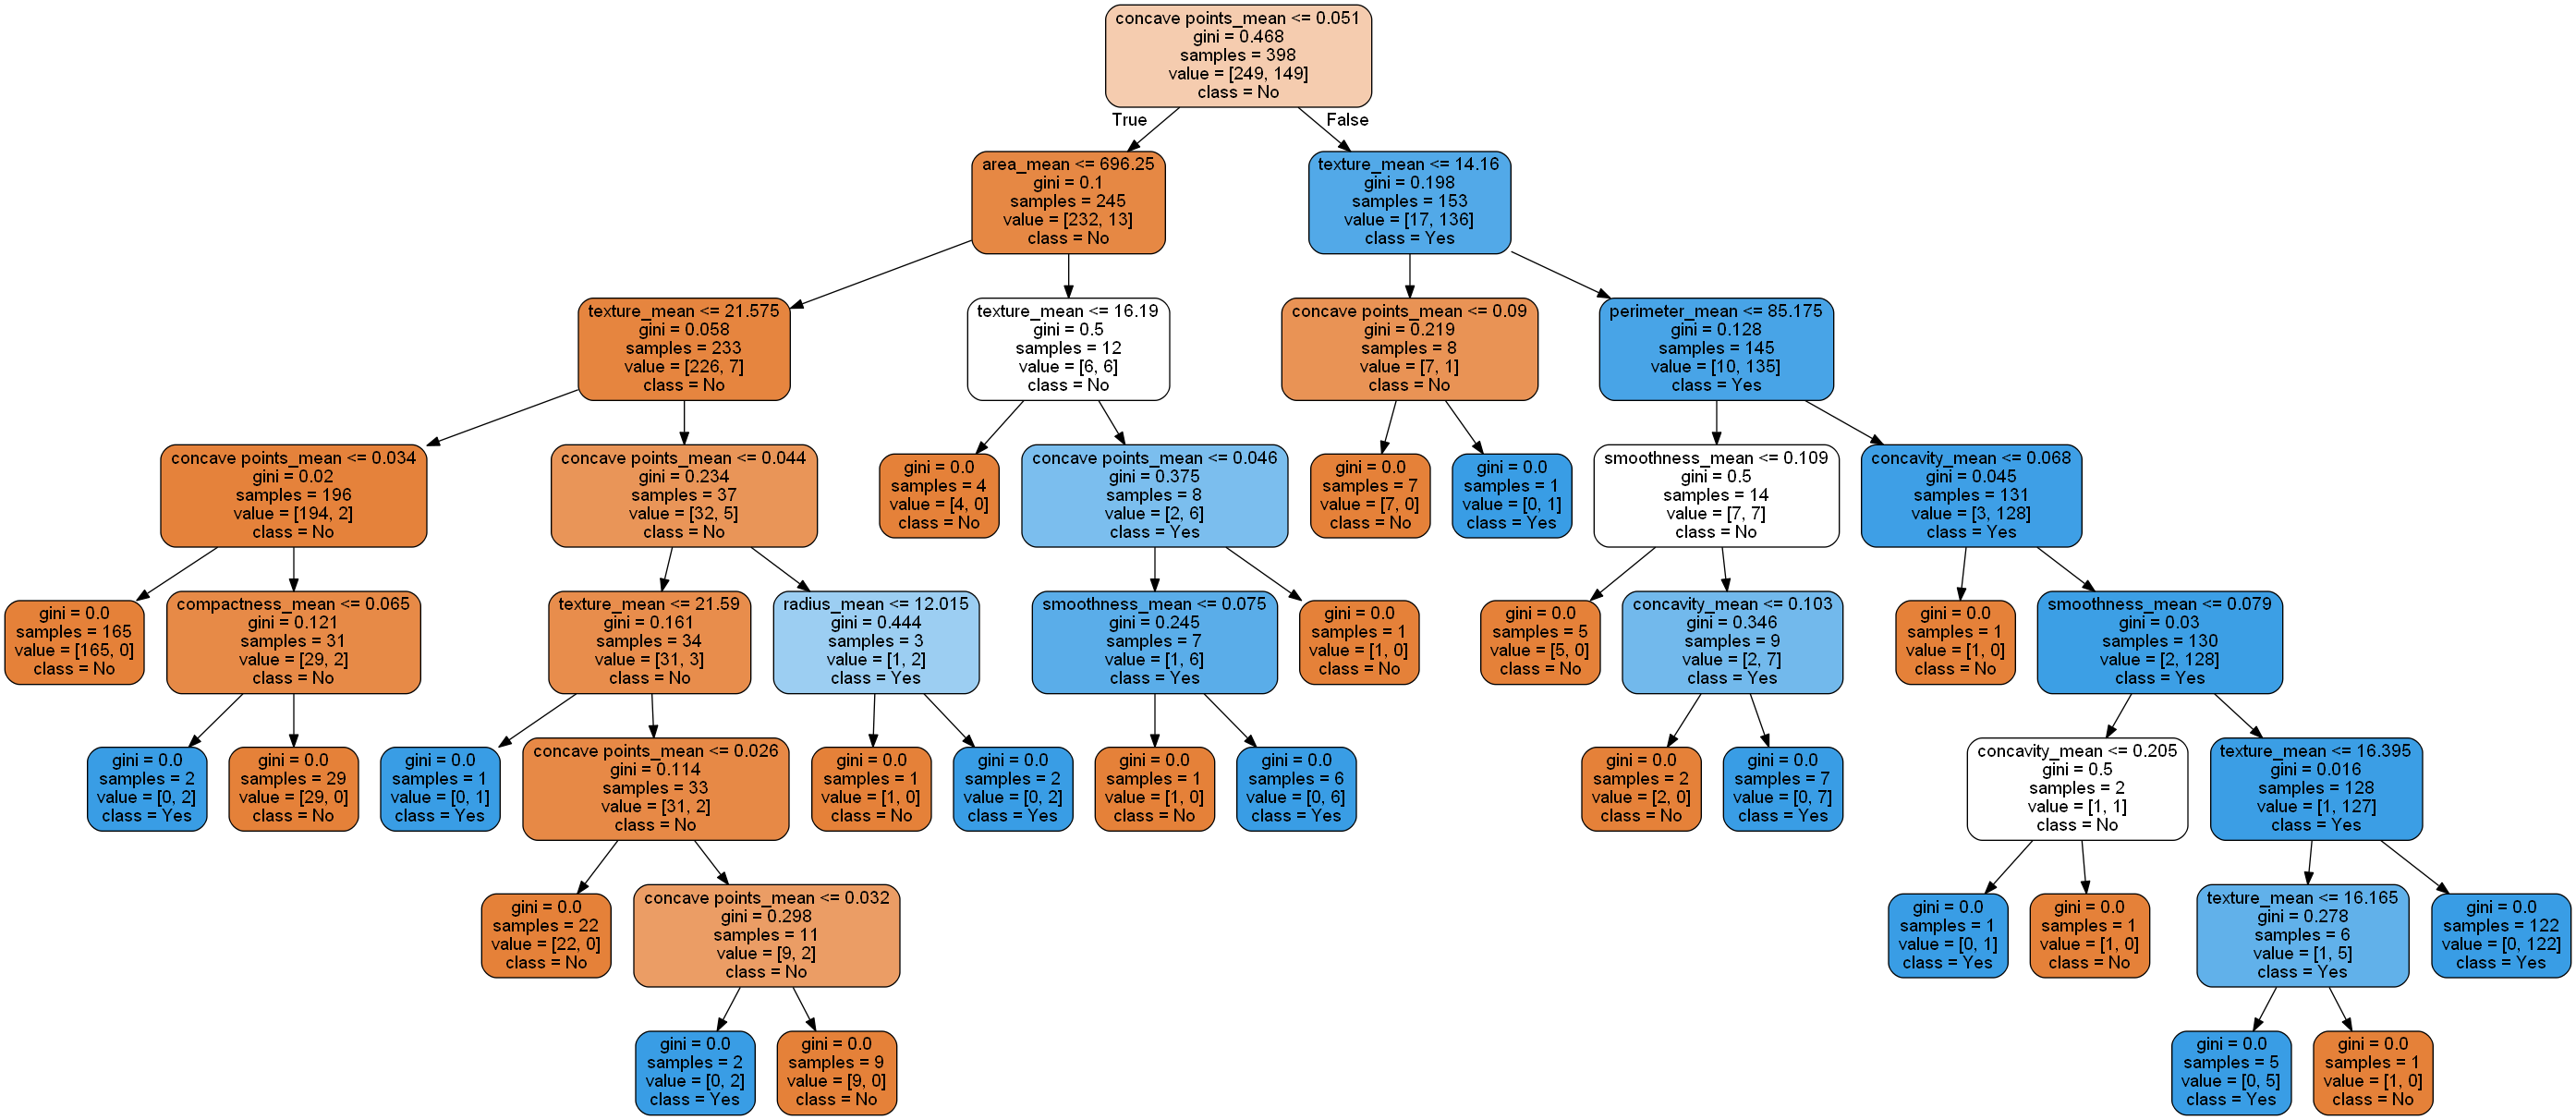

In [45]:
dot_data = export_graphviz(dt,
filled = True,
rounded= True,
class_names=target_name,
feature_names= feature_name,
out_file= None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') ## 그래프 저장 => png 파일 
dt_graph = pydotplus.graph_from_dot_data(dot_data) # png 파일을 가져와서
Image(dt_graph.create_png()) # VS에서 보여준다. 

# 교차 검정

In [46]:
scores = cross_validate(estimator= dt, X = x_train,y=y_train,
scoring=['accuracy'],# 클래스가 2개 이상일 경우 accuracy만 사용가능 (여러가지 제한이 있다. ) dt로 모델을 돌렸을 때 정확도
 cv = 10, # 훈련용 데이터를 10개로 나눠서 쓰겠다. (9훈, 1테)
 n_jobs = -1,
 return_train_score= False)

print('CV 정확도 점수 : %s'% scores['test_accuracy']) # 교차검증한 값의 정확도
print('CV 정확도 : %.3f +/- %.3f' %(np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV 정확도 점수 : [0.9        0.95       0.875      0.925      0.875      0.95
 0.925      0.9        0.94871795 0.97435897]
CV 정확도 : 0.922 +/- 0.032


# 파이프라인 모델 만들기
- 파이프라인을 이용하여 최적 모델 만들기
- 기본 모형은 아무 옵션이 없는 모델 부터 시작
- 파라미터 옵션 확인 : pipe_tree.get_params().keys()
- 하이퍼 파라미터 세팅 시 이용

In [47]:
pipe_tree = make_pipeline(DecisionTreeClassifier()) 

In [48]:
pipe_tree.get_params().keys() # 디폴트 모델
# 아래와 옵션이 다르다. make_pipeline : 여러 모델을 뭉쳐놨다. 여러 모델을 쓸 수 있다. decisiontreeclassifier__max_depth

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [49]:
# DecisionTreeClassifier._get_param_names() # max_depth -> decisiontreeclassifier__max_depth

# 학습 곡선으로 편향과 분산 문제 해결하기 
- 훈련 샘플링 수를 이용하여 편향과 분산 검정
- 편향 : 정확도가 높은지 검정
- 분산 : 훈련 / 검정 데이터의 정확도 차이가 적은지

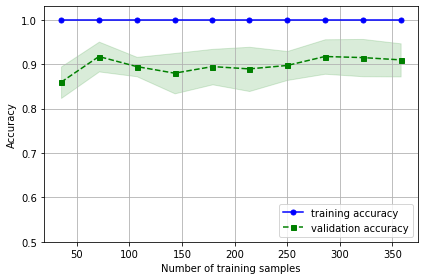

In [50]:
train_sizes, train_scores, test_scores = learning_curve( estimator = pipe_tree, # 변경
X = x_train, y= y_train, train_sizes = np.linspace(0.1,1.0,10),
cv = 10,
n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores , axis = 1)
test_mean = np.mean(test_scores , axis = 1)
test_std = np.std(test_scores,axis = 1)

plt.plot(train_sizes,train_mean, color = 'blue', marker = 'o',markersize = 5, label = 'training accuracy')

plt.fill_between(train_sizes, train_mean + train_std,train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes,test_mean, color = 'green',linestyle = '--', marker = 's',markersize = 5, label = 'validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std,test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.5,1.03]) # 변경
plt.tight_layout()
plt.show()
# 과소 적합 확인 

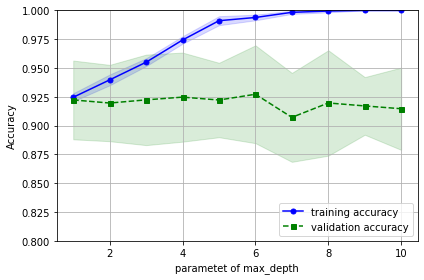

In [51]:
# DT에서 가장 중요한 요소가 depth 

param_range =[ 1,2,3,4,5,6,7,8,9,10 ] # 변경
train_scores, test_scores = validation_curve(
estimator= pipe_tree,# 변경
X = x_train,
y= y_train,
param_name= 'decisiontreeclassifier__max_depth',# 변경
param_range= param_range,
cv = 10
)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores,axis= 1)
test_mean = np.mean(test_scores , axis= 1)
test_std = np.std(test_scores,axis= 1)

plt.plot(param_range,train_mean, color = 'blue', marker = 'o',markersize = 5, label = 'training accuracy')

plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(param_range,test_mean, color = 'green',linestyle = '--', marker = 's',markersize = 5, label = 'validation accuracy')

plt.fill_between(param_range, test_mean + test_std,test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc = 'lower right')
plt.xlabel('parametet of max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.00]) # 변경
plt.tight_layout()
plt.show()

#과대 적합 확인

In [52]:
param_range1 = list(range(1,11)) # 변경
param_range2 = list(range(10,60,10)) # 변경

param_grid = [{'decisiontreeclassifier__max_depth':param_range1, # 변경
'decisiontreeclassifier__min_samples_leaf':param_range2}] # 변경

gs = GridSearchCV(estimator= pipe_tree,# 변경
param_grid= param_grid,
scoring= 'accuracy',
cv= 10,
n_jobs= -1)

gs = gs.fit(x_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9223076923076923
{'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__min_samples_leaf': 10}


# 최적화 모델 검정

In [53]:
best_tree = gs.best_estimator_
best_tree.fit(x_train,y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=1, min_samples_leaf=10))])

# 검증용 데이터로 예측

In [54]:
y_pred = best_tree.predict(x_test)

In [55]:
confmat = pd.DataFrame(confusion_matrix(y_test,y_pred),
index = ['True[0]','True[1]'],
columns =['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],97,11
True[1],7,56


In [56]:
# 처음 정오 분류표 
#	Predict[0]	Predict[1]
#True[0] 	101	    7
#True[1] 	6	    57

In [57]:
print('잘못 분류된 샘플 개수 : %d' %(y_test != y_pred).sum())
print('정확도 : %.3f'% accuracy_score(y_test,y_pred))
print('정밀도 : %.3f'% precision_score(y_test,y_pred))
print('재현율 : %.3f'% recall_score(y_test,y_pred))
print('F1 : %.3f'% f1_score(y_test,y_pred))


잘못 분류된 샘플 개수 : 18
정확도 : 0.895
정밀도 : 0.836
재현율 : 0.889
F1 : 0.862


In [58]:
# 정확도 증가

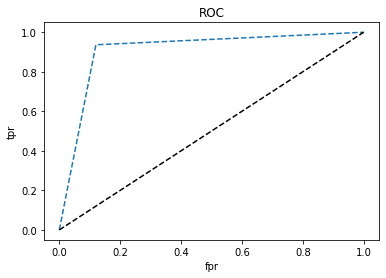

In [59]:
# roc 곡선 커브
fpr,tpr,thresholds = roc_curve(y_test,dt.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,'--',label = 'decision Tree')
plt.plot([0,1],[0,1],'k--',label = 'random guess')
plt.plot([fpr],[tpr],'r-',ms = 10)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC')
plt.show()